## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_20-26-03-23.csv', firstRow=186, lastRow=192)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_200323_S187-192.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=84s and ended at t=510s; mass=44.80385g
This equals a volume of 44.894m; expected was 45.325mL; error is 0.951%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


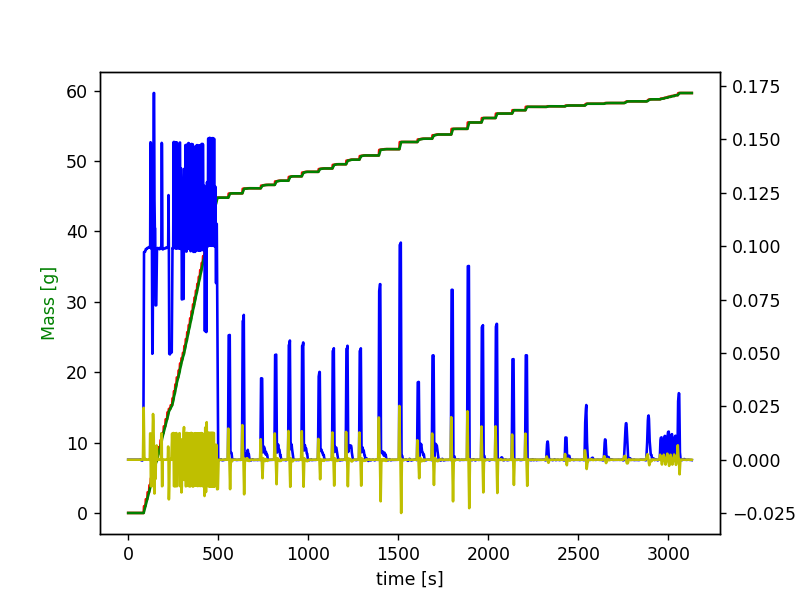

Addition of 0.615g Plantapon ACG 50 detected from 552s to 582s - expected volume = 0.581mL and actual volume = 0.551mL (resulting error is 5.15%)
Addition of 0.725g Plantapon ACG 50 detected from 630s to 678s - expected volume = 0.581mL and actual volume = 0.649mL (resulting error is 11.766%)
Addition of 0.488g Plantapon LC 7 detected from 732s to 780s - expected volume = 0.601mL and actual volume = 0.465mL (resulting error is 22.599%)
Addition of 0.595g Plantapon LC 7 detected from 810s to 854s - expected volume = 0.601mL and actual volume = 0.567mL (resulting error is 5.674%)
Addition of 0.625g Plantapon LC 7 detected from 886s to 922s - expected volume = 0.599mL and actual volume = 0.592mL (resulting error is 1.186%)
Addition of 0.643g Plantapon LC 7 detected from 960s to 1002s - expected volume = 0.599mL and actual volume = 0.609mL (resulting error is 1.676%)
Addition of 0.48g Plantacare 818 detected from 1052s to 1094s - expected volume = 0.551mL and actual volume = 0.443mL (resul

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


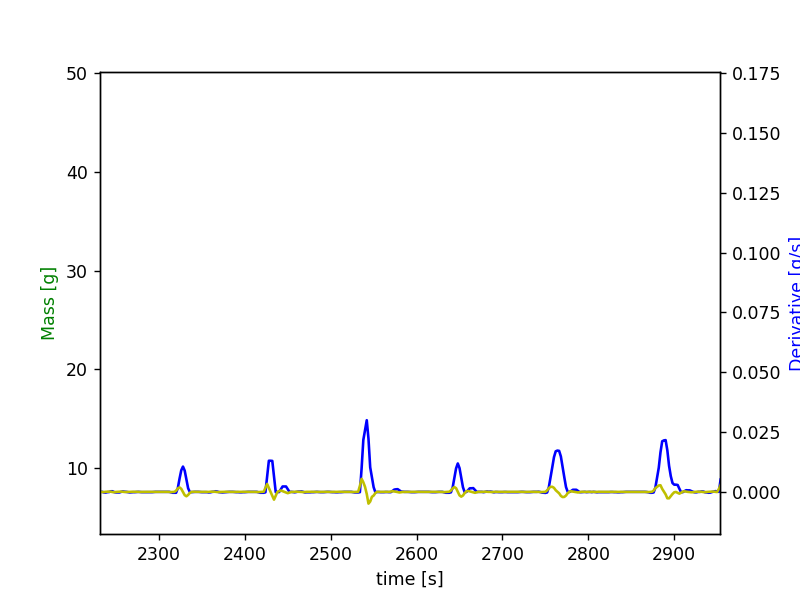

Addition of 0.081g Luviquat Excellence detected from 2318s to 2340s - expected volume = 0.092mL and actual volume = 0.074mL (resulting error is 19.431%)
Addition of 0.119g Luviquat Excellence detected from 2422s to 2456s - expected volume = 0.101mL and actual volume = 0.107mL (resulting error is 6.25%)
Addition of 0.254g Luviquat Excellence detected from 2532s to 2556s - expected volume = 0.239mL and actual volume = 0.232mL (resulting error is 2.826%)
Addition of 0.109g Luviquat Excellence detected from 2570s to 2672s - expected volume = 0.092mL and actual volume = 0.097mL (resulting error is 5.947%)
Addition of 0.233g Luviquat Excellence detected from 2750s to 2780s - expected volume = 0.214mL and actual volume = 0.211mL (resulting error is 1.165%)
Addition of 0.292g Luviquat Excellence detected from 2874s to 2912s - expected volume = 0.26mL and actual volume = 0.268mL (resulting error is 3.18%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


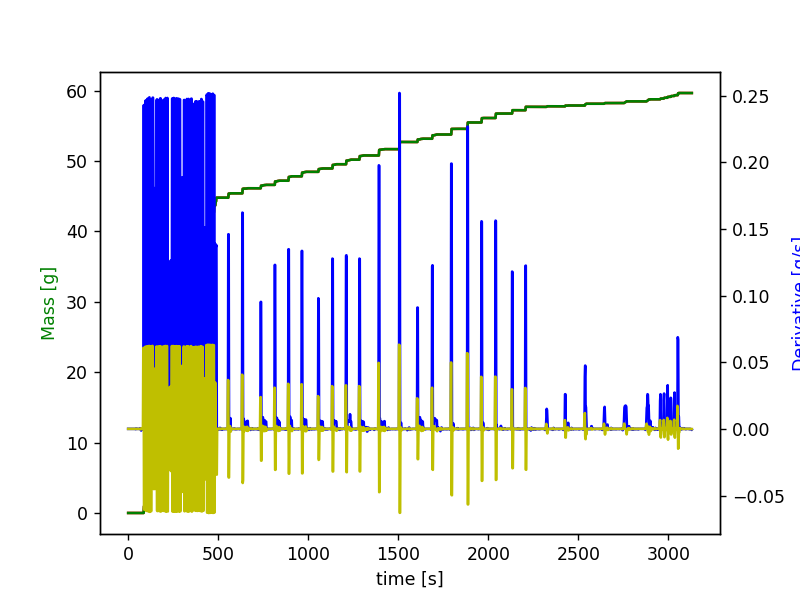

Addition of 0.106g Arlypon TT detected from 2950s to 2964s - expected volume = 0.123mL and actual volume = 0.111mL (resulting error is 9.402%)
Addition of 0.111g Arlypon TT detected from 2970s to 2984s - expected volume = 0.107mL and actual volume = 0.115mL (resulting error is 7.767%)
Addition of 0.13g Arlypon TT detected from 2990s to 3004s - expected volume = 0.133mL and actual volume = 0.137mL (resulting error is 2.778%)
Addition of 0.12g Arlypon TT detected from 3008s to 3024s - expected volume = 0.113mL and actual volume = 0.124mL (resulting error is 9.545%)
Addition of 0.111g Arlypon TT detected from 3028s to 3042s - expected volume = 0.107mL and actual volume = 0.116mL (resulting error is 8.824%)
Addition of 0.309g Arlypon TT detected from 3048s to 3064s - expected volume = 0.324mL and actual volume = 0.327mL (resulting error is 0.817%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_200323_S187-S192.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_22600\4060212237.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
186,187.0,0.0,0.000000,11.002089,10.987874,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.826223,0.0,0.0,0.0,0.0,1.076247
187,188.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,10.152988,0.000000,8.016143,0.0,0.0,0.000000,1.179428,0.0,0.0,0.0,0.0,1.100138
188,189.0,0.0,0.000000,0.000000,12.418880,8.934823,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.510352,0.0,0.0,0.0,0.0,1.281776
189,190.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.028431,0.0,0.0,9.538704,1.087568,0.0,0.0,0.0,0.0,1.200934
190,191.0,0.0,0.000000,12.460699,0.000000,0.000000,0.0,0.000000,0.000000,12.587458,0.0,0.0,0.000000,2.291979,0.0,0.0,0.0,0.0,1.090716
191,192.0,0.0,13.243059,0.000000,0.000000,0.000000,0.0,0.000000,10.589307,0.000000,0.0,0.0,0.000000,2.886016,0.0,0.0,0.0,0.0,3.049096
